In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import os
from sklearn.decomposition import PCA
import umap

In [82]:
# path_to_SNP_genotype_matrix  = '/home/yiw021/ps2/ps2_pca.genotypes.tab'
# mat = np.loadtxt(path_to_SNP_genotype_matrix)
# pca = PCA(n_components=2)
#pca_fit = pca.fit(mat.transpose())
#pca_projected_mat = pca.transform(mat.transpose())
#np.savetxt('/home/yiw021/ps2/ps2_pca.projection.txt',pca_projected_mat)

### PCA analysis

In [2]:
genotype_data = np.loadtxt('./genotype_matrix.csv',delimiter=',')

In [3]:
genotype_data.shape

(43836, 2504)

In [6]:
data_transpose = genotype_data.transpose()

### Do PCA. Only once. I have saved top 100 PCs

In [5]:
# pca = PCA(n_components=100)

In [7]:
# pca_fit = pca.fit(data_transpose)

In [8]:
# pca_projected_mat = pca.transform(data_transpose)

In [10]:
# save top100 PCA
# np.save('./PCA_top100.npy',pca_projected_mat)

In [4]:
# load directly
pca_projected_mat = np.load('./PCA_top100.npy')

In [5]:
pca_projected_mat.shape

(2504, 100)

In [7]:
pop_to_color = {
    # EAS - yellow & orange
    "CHB": "yellow", "JPT": "khaki", "CHS": "gold", "CDX": "orange", "KHV": "darkorange", 
    # EUR - blue
    "CEU": "blue", "TSI": "dodgerblue", "FIN": "deepskyblue", "GBR": "darkblue", "IBS": "royalblue",
    # AFR - green
    "YRI": "green", "LWK": "forestgreen", "GWD": "limegreen", "MSL": "lime", "ESN": "greenyellow", 
    "ASW": "springgreen", "ACB": "seagreen", 
    # AMR - purple
    "MXL": "purple", "PUR": "darkviolet", "CLM": "magenta", "PEL": "deeppink", 
    # SAS - red
    "GIH": "red", "PJL": "crimson", "BEB": "firebrick", "STU": "lightcoral", "ITU": "indianred", 
    # None
    "None": "lightgrey"  
}

In [8]:
sample_to_pop = {}
with open("./df_pop.csv", "r") as f:
    for line in f:
        sample, pop = line.strip().split(",")
        sample_to_pop[sample] = pop

In [9]:
if not os.path.exists('./df_pop.csv'):
    samples = []
else: samples = [item.strip() for item in open('./df_pop.csv', "r").readlines()[1:]]
colors = []
for sample in samples:
    sample_population = sample.split(',')[1]
    #pop = sample_to_pop.get(sample_population, "None")
    color = pop_to_color[sample_population]
    colors.append(color)



## Load the top 2 PCs

In [10]:
pc1 = pca_projected_mat[:,0]
pc2 = pca_projected_mat[:,1]



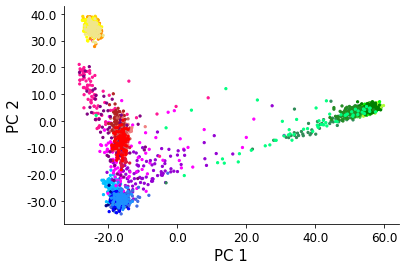

In [11]:
# Make the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(pc1, pc2, color=colors, s=5)
# Now make it look a little prettier since I can't stand matplotlib defaults...
ax.set_xlabel("PC 1", size=15)
ax.set_ylabel("PC 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();



In [12]:
fig.savefig('./PCA_top2.png')

## Use PC 11,12
### Later principal components do not capture much information
### only PC1,PC2 are most informative of population structure

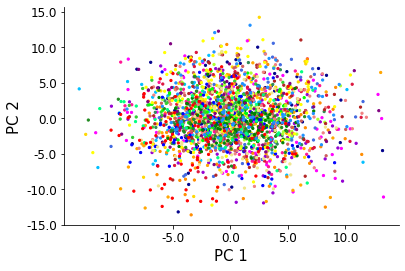

In [13]:
pc1 = pca_projected_mat[:,10]
pc2 = pca_projected_mat[:,11]

# Make the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(pc1, pc2, color=colors, s=5)
# Now make it look a little prettier since I can't stand matplotlib defaults...
ax.set_xlabel("PC 1", size=15)
ax.set_ylabel("PC 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();



### Run U-map

In [14]:
reducer = umap.UMAP()

## Run UMAP on full genotype matrix:

In [36]:
embedding_full = reducer.fit_transform(data_transpose)

In [39]:
embedding_full.shape

(2504, 2)

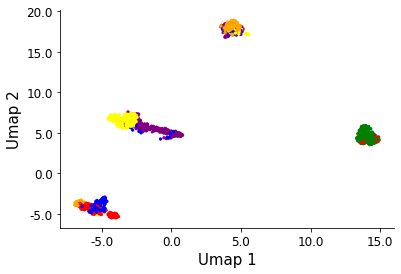

In [40]:
# Make the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(embedding_full[:,0],embedding_full[:,1], color=colors, s=5)
# Now make it look a little prettier since I can't stand matplotlib defaults...
ax.set_xlabel("Umap 1", size=15)
ax.set_ylabel("Umap 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();


### ABOVE UMAP: SEPARATES MAJOR POPULATION GROUPS BUT DOES NOT SHOW ADMIXTURE PROPERLY
### IT ALSO CLUSTERS MANY POPULATION GROUPS TOGETHER

# Run UMAP with top 15 PCs

In [15]:
top15_PC_matrix = pca_projected_mat[:,0:15]


In [16]:
top15_PC_matrix.shape

(2504, 15)

In [17]:
embedding_PCtop15 = reducer.fit_transform(top15_PC_matrix)

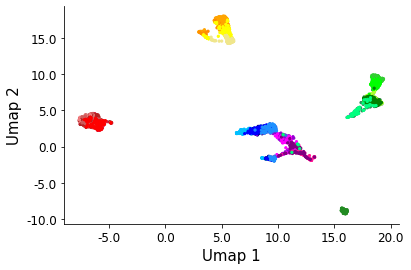

In [18]:
# Make the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(embedding_PCtop15[:,0],embedding_PCtop15[:,1], color=colors, s=5)
# Now make it look a little prettier since I can't stand matplotlib defaults...
ax.set_xlabel("Umap 1", size=15)
ax.set_ylabel("Umap 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();


In [19]:
fig.savefig('./Umap_top15_PC.png')

### tsne

In [20]:
from sklearn.manifold import TSNE

In [21]:
tsne = TSNE(n_components=2)
tsne_embedding_top15PCs = tsne.fit(top15_PC_matrix)

In [27]:
tsne_embedding_matrix = tsne_embedding_top15PCs.embedding_

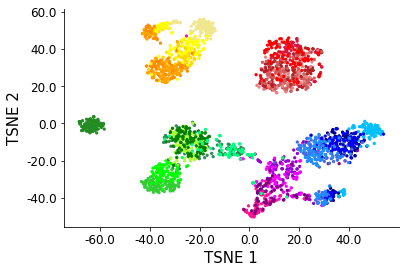

In [29]:
# Make the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tsne_embedding_matrix[:,0],tsne_embedding_matrix[:,1], color=colors, s=5)
# Now make it look a little prettier since I can't stand matplotlib defaults...
ax.set_xlabel("TSNE 1", size=15)
ax.set_ylabel("TSNE 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();


In [30]:
fig.savefig('./TSNE_on_top15_PCs.png')

### UMAP on top15 PCs evidently caputures more structure. We need to change the color scheme to visualize this better

### Visualize only one continental population: and learn detailed structure

### Look at only Europeans 

In [31]:
european_family = ["CEU","TSI", "FIN", "GBR", "IBS"]